In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from yellowbrick.model_selection import LearningCurve
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
import pickle

In [2]:
# loading the house dataset
df = pd.read_csv("house_dataset.csv")

In [3]:
# removing unnecessary columns
df.drop(columns = ["id", "date", "zipcode", "waterfront", "view","yr_renovated","sqft_living"],inplace = True)
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   condition      21613 non-null  int64  
 6   grade          21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  lat            21613 non-null  float64
 11  long           21613 non-null  float64
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

5
0


In [6]:
# interquartile range (IQR) -- for all columns in the dataset 
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Only apply to numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[df[column].between(lower_bound, upper_bound)]

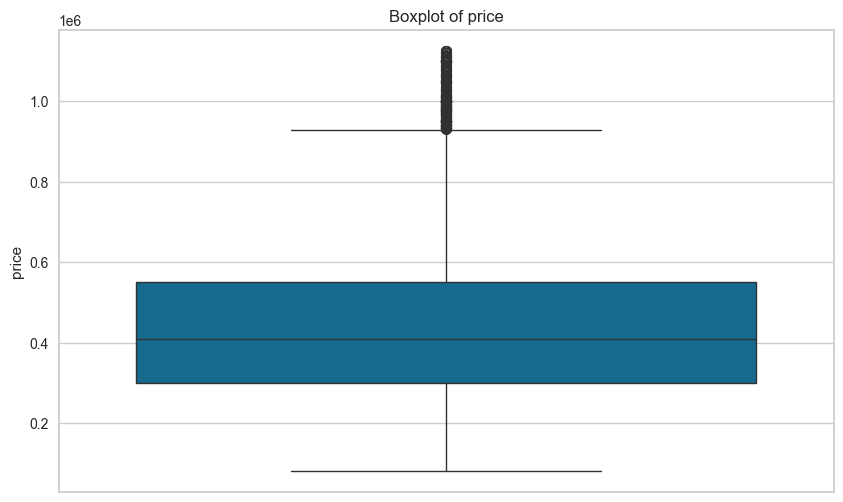

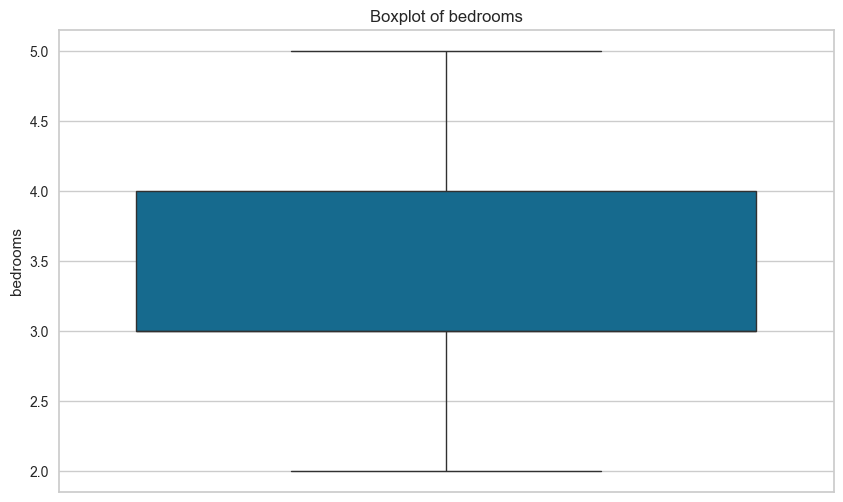

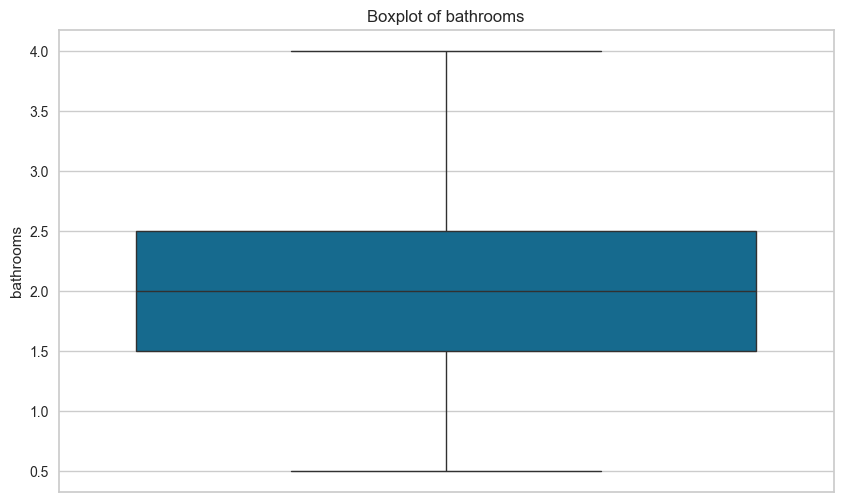

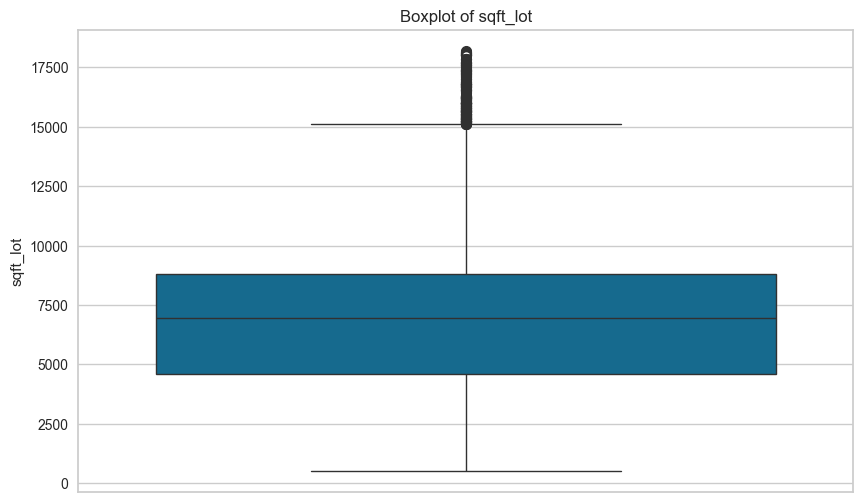

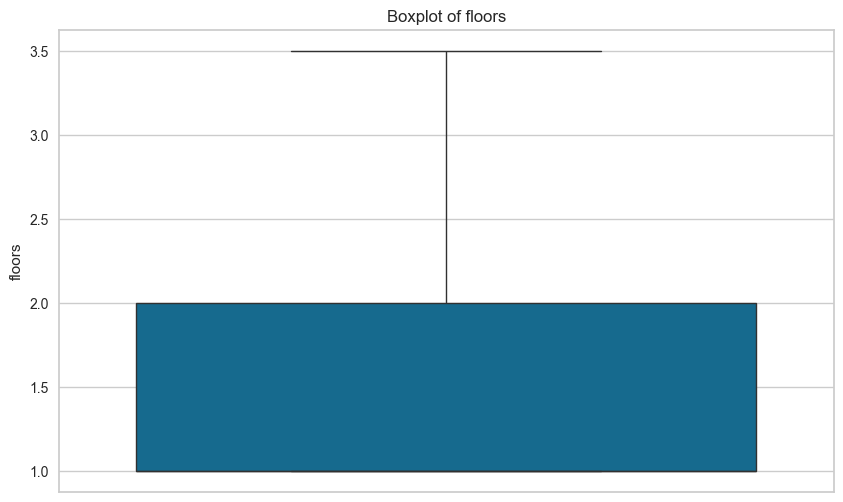

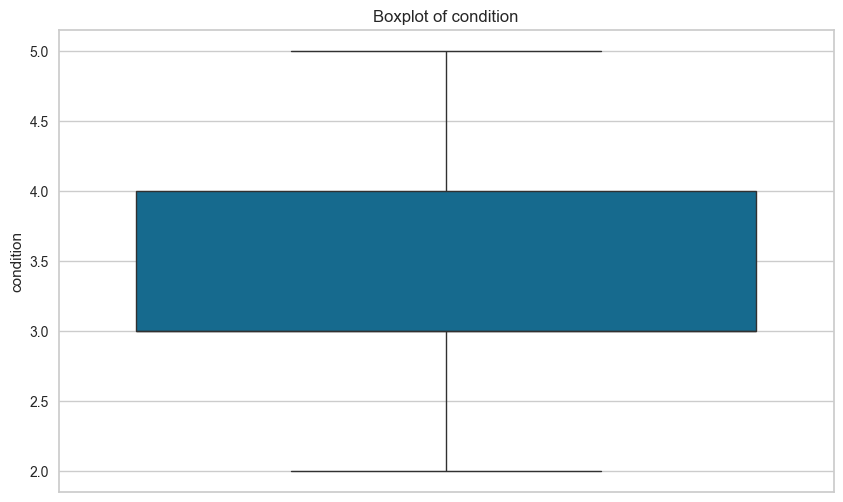

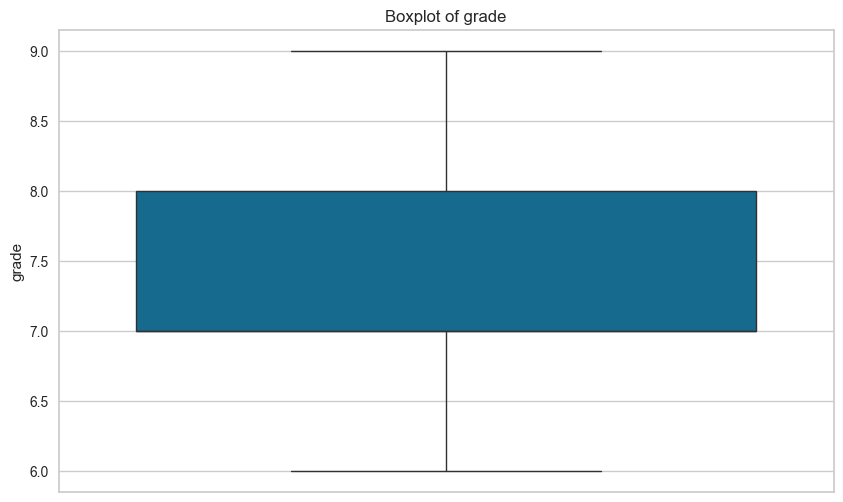

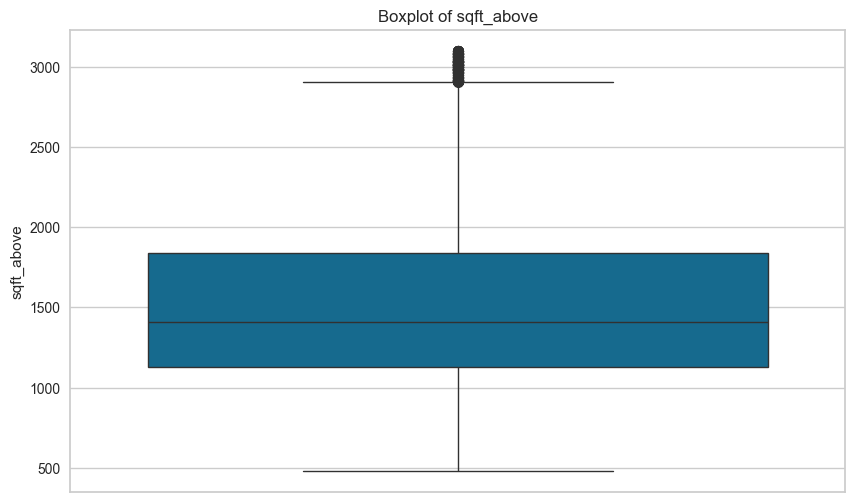

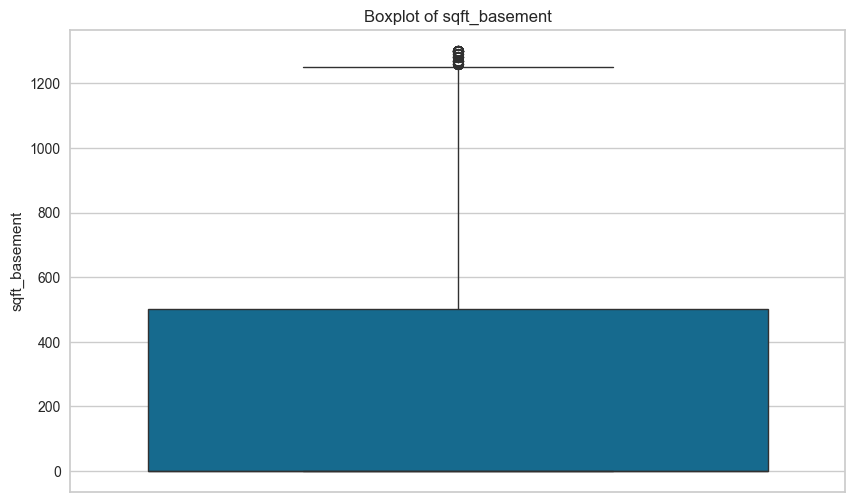

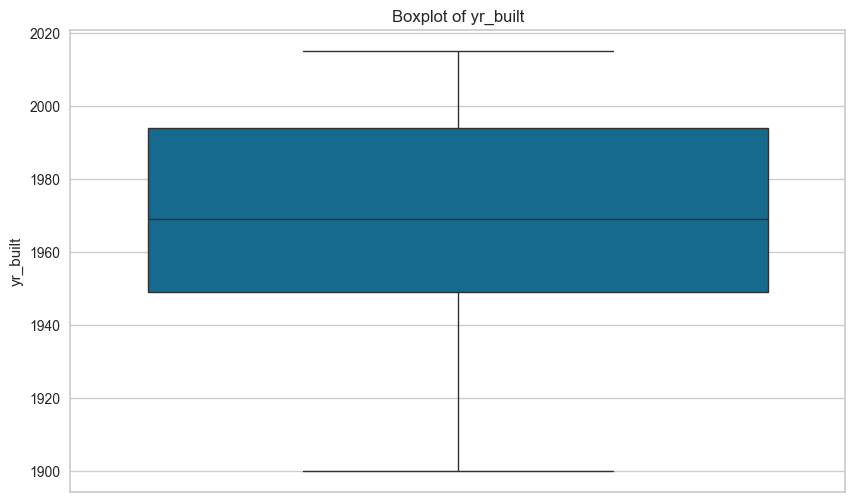

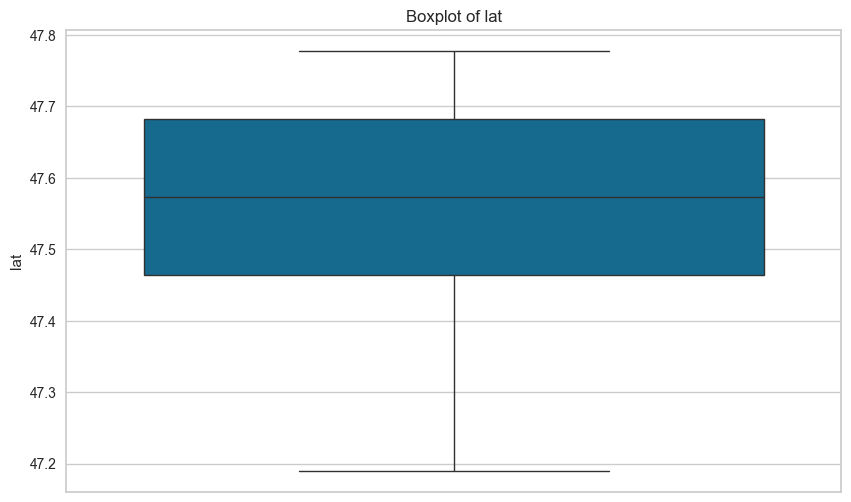

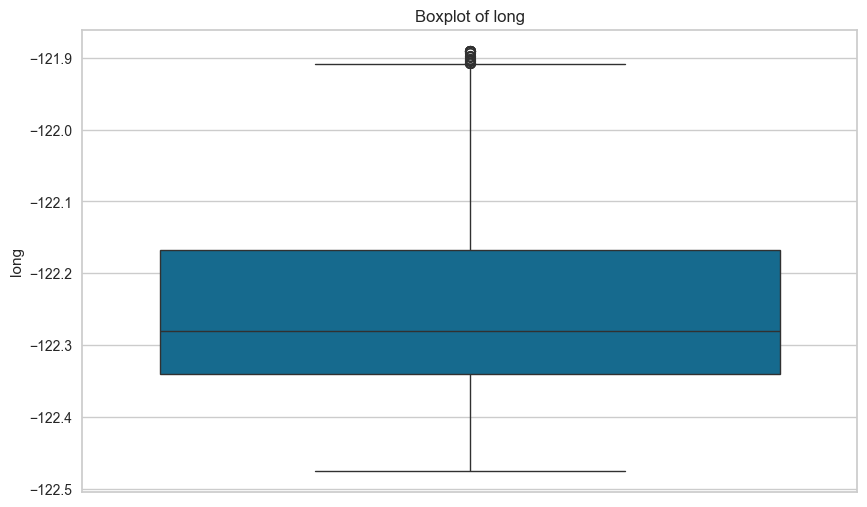

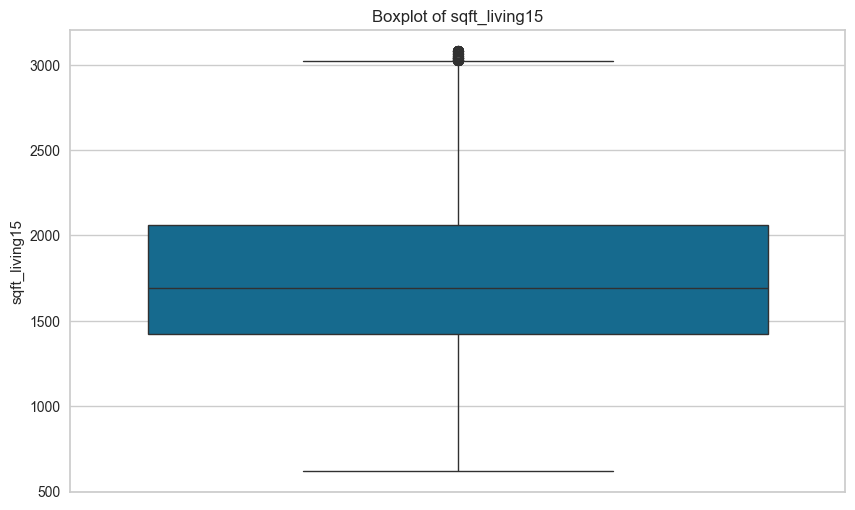

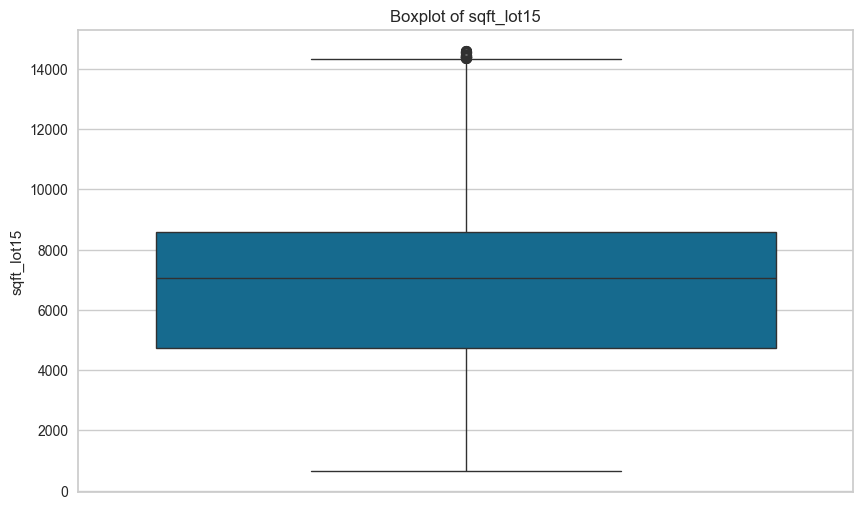

In [7]:
# doing boxplot to check all columns
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

<Figure size 1000x600 with 0 Axes>

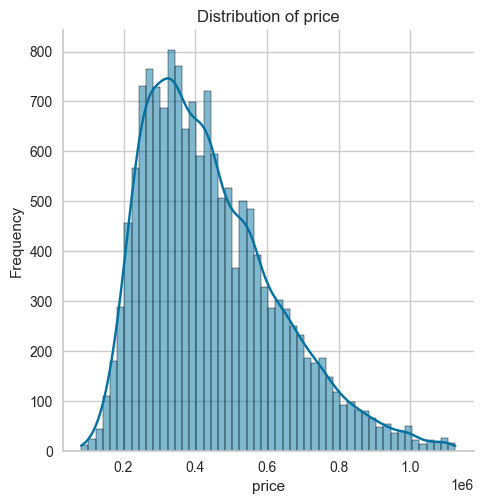

<Figure size 1000x600 with 0 Axes>

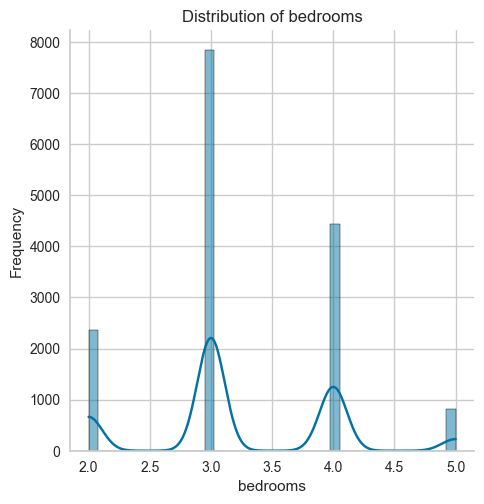

<Figure size 1000x600 with 0 Axes>

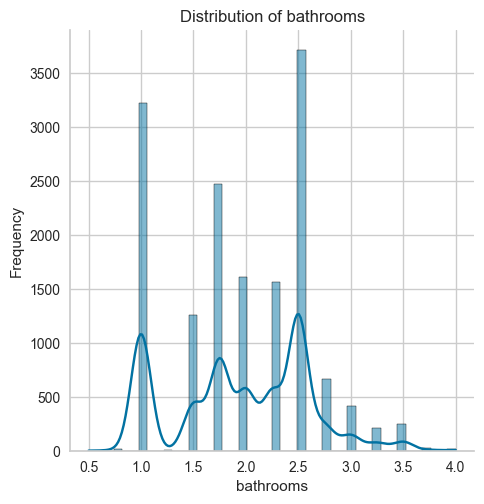

<Figure size 1000x600 with 0 Axes>

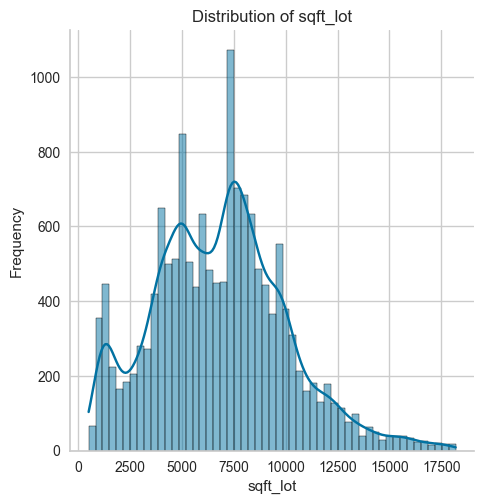

<Figure size 1000x600 with 0 Axes>

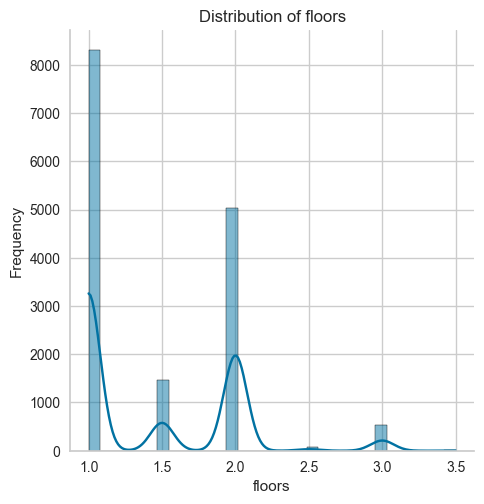

<Figure size 1000x600 with 0 Axes>

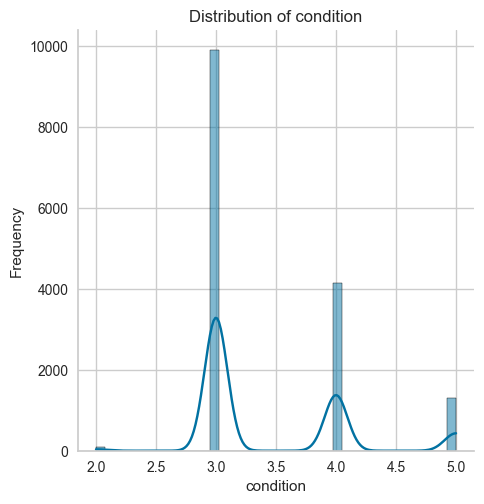

<Figure size 1000x600 with 0 Axes>

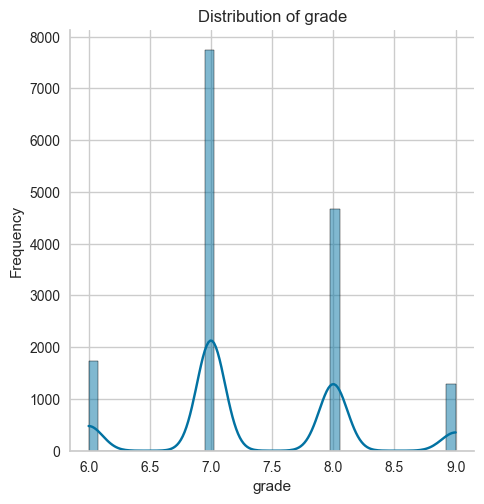

<Figure size 1000x600 with 0 Axes>

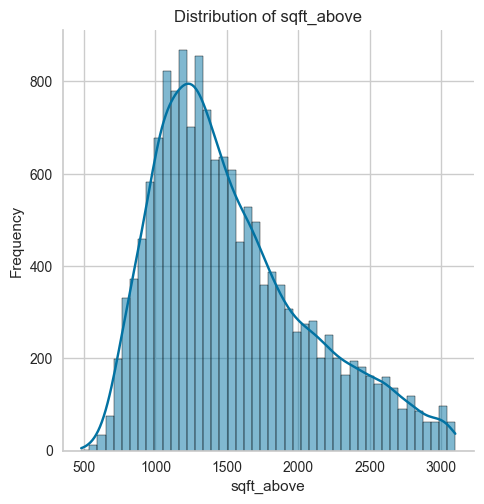

<Figure size 1000x600 with 0 Axes>

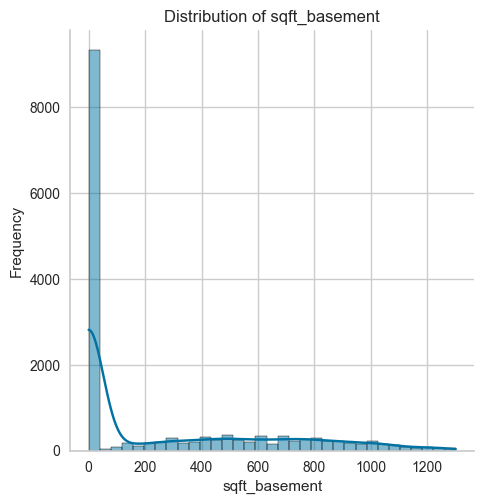

<Figure size 1000x600 with 0 Axes>

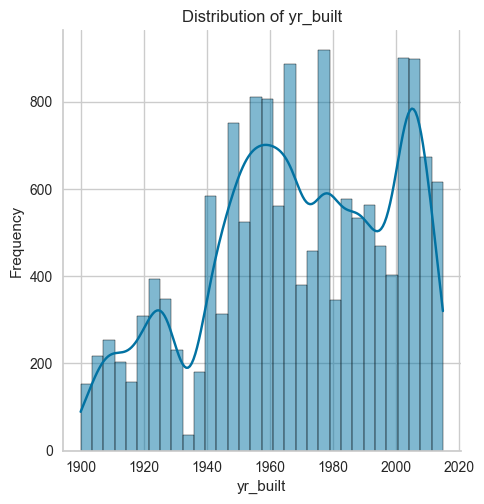

<Figure size 1000x600 with 0 Axes>

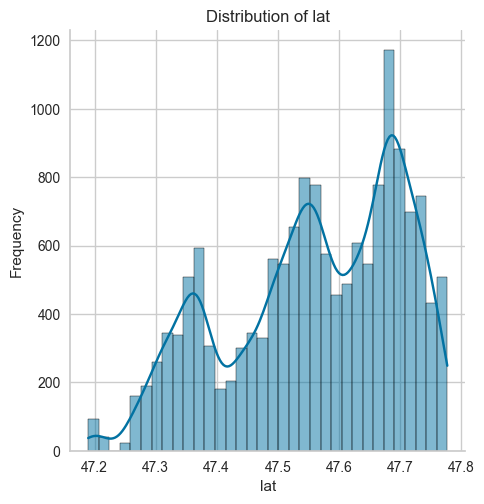

<Figure size 1000x600 with 0 Axes>

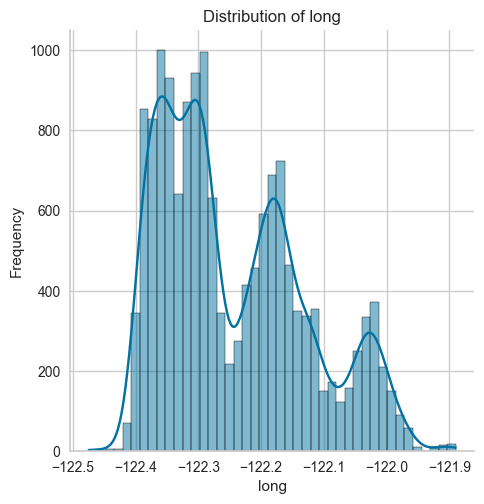

<Figure size 1000x600 with 0 Axes>

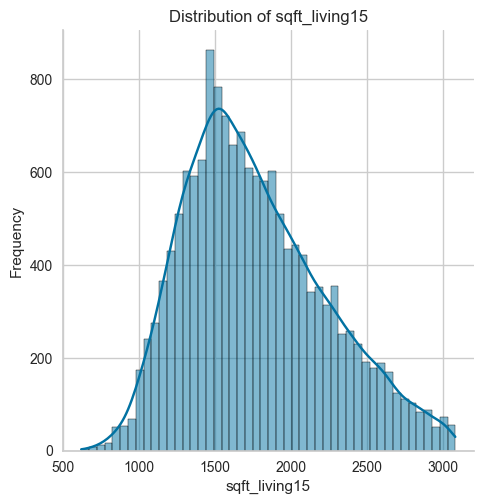

<Figure size 1000x600 with 0 Axes>

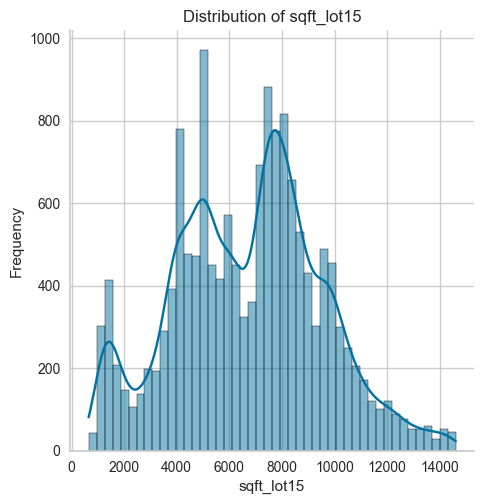

In [8]:
# checking the distribution of each of the columns
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.displot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
df.reset_index(inplace=True)

In [10]:
df

,index,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,1,538000.0,3,2.25,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,2,180000.0,2,1.00,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,3,604000.0,4,3.00,5000,1.0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,4,510000.0,3,2.00,8080,1.0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15436,21608,360000.0,3,2.50,1131,3.0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
15437,21609,400000.0,4,2.50,5813,2.0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
15438,21610,402101.0,2,0.75,1350,2.0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
15439,21611,400000.0,3,2.50,2388,2.0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


In [11]:
# Separate the independent and dependent variables
X = df.drop(columns='price')  # Drops the dependent column and stores all other independent columns
y = df['price']  # Stores the dependent column        

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

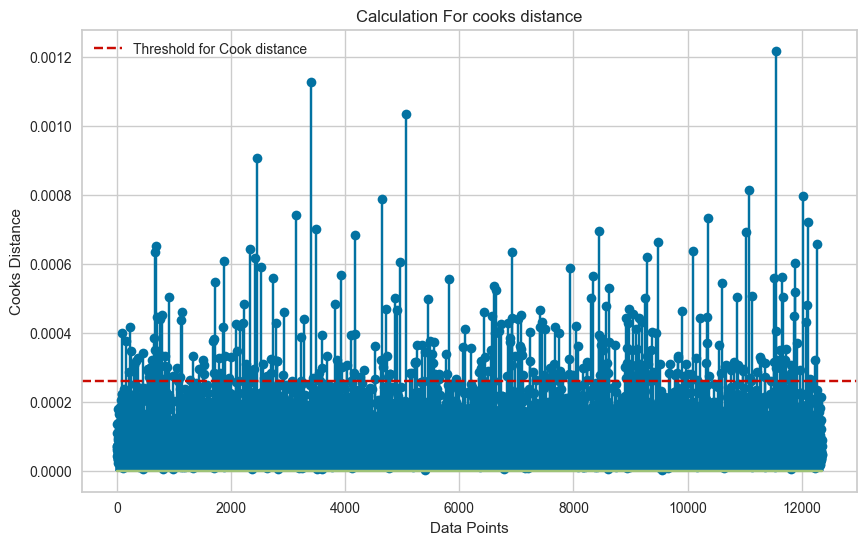

High influence points indices[   88   154   209   229   243   291   323   362   457   535   544   549
   555   561   592   604   613   639   640   657   663   678   703   732
   745   759   782   833   834   868   914   976  1042  1070  1074  1101
  1116  1136  1286  1329  1431  1502  1515  1518  1689  1704  1706  1719
  1753  1783  1798  1862  1868  1877  1896  1959  1988  2090  2096  2161
  2209  2217  2258  2262  2297  2326  2342  2404  2414  2458  2519  2552
  2569  2570  2619  2693  2700  2732  2777  2799  2807  2909  2919  3059
  3127  3223  3227  3281  3400  3440  3482  3494  3533  3553  3590  3600
  3679  3821  3847  3895  3931  3939  4029  4107  4161  4168  4170  4257
  4321  4518  4529  4632  4635  4661  4715  4731  4747  4778  4790  4876
  4912  4955  5069  5133  5173  5217  5219  5241  5252  5349  5384  5398
  5455  5488  5519  5543  5560  5565  5566  5641  5645  5774  5776  5814
  5947  6061  6102  6195  6349  6374  6380  6393  6440  6452  6510  6548
  6578  6598  6615  66

326

In [12]:
#---------Checking For The Influential Points -------
# cook's distance -- used in regressional analysis to identify data points that might be significantly affecting 
# the model. It calculates how much the regression results would change if a particular data point were removed. 
# To do this it checks two things: residual and leverage. Residual is how far the actual value is from the predicted
# value (error). Leverage checks how extreme the values are for a datapoint. It compares the VALUE of the independent variables
# in one datapoint and compares it the mean of the VALUES of independent variables in other datapoints. 
# Calculation -- it uses a formula that uses residual and leverage to calculate the distance
# then it checks whether this distance is ABOVE or BELOW the threshold value 
# if it is ABOVE the threshold then it is strongly impacting the model like an outlier so it is removed. 
# if it is BELOW the threshold then it is left untouched. 

#Add constant term for the intercept
X_with_const=sm.add_constant(X_train_scaled)

#Fit the liner regression line 
model = sm.OLS(y_train,X_train_scaled).fit()

#Calculate the Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

#Plot Cooks' Distance
plt.figure(figsize=(10,6))
plt.stem(np.arange(len(cooks_d)),cooks_d,markerfmt='o',linefmt='-',basefmt='')
plt.axhline(y=4/len(X),color='r',linestyle='--',label='Threshold for Cook distance')
plt.xlabel('Data Points')
plt.ylabel('Cooks Distance')
plt.title('Calculation For cooks distance')
plt.legend()
plt.show()

threshold = 4/len(X)
high_influence_points= np.where(cooks_d>threshold)[0]
print(f'High influence points indices{high_influence_points}')
len(high_influence_points)

In [13]:
high_influence_points

array([   88,   154,   209,   229,   243,   291,   323,   362,   457,
         535,   544,   549,   555,   561,   592,   604,   613,   639,
         640,   657,   663,   678,   703,   732,   745,   759,   782,
         833,   834,   868,   914,   976,  1042,  1070,  1074,  1101,
        1116,  1136,  1286,  1329,  1431,  1502,  1515,  1518,  1689,
        1704,  1706,  1719,  1753,  1783,  1798,  1862,  1868,  1877,
        1896,  1959,  1988,  2090,  2096,  2161,  2209,  2217,  2258,
        2262,  2297,  2326,  2342,  2404,  2414,  2458,  2519,  2552,
        2569,  2570,  2619,  2693,  2700,  2732,  2777,  2799,  2807,
        2909,  2919,  3059,  3127,  3223,  3227,  3281,  3400,  3440,
        3482,  3494,  3533,  3553,  3590,  3600,  3679,  3821,  3847,
        3895,  3931,  3939,  4029,  4107,  4161,  4168,  4170,  4257,
        4321,  4518,  4529,  4632,  4635,  4661,  4715,  4731,  4747,
        4778,  4790,  4876,  4912,  4955,  5069,  5133,  5173,  5217,
        5219,  5241,

In [14]:
df.reset_index(inplace=True)

In [15]:
# Drop the influential points
df_cleaned = df.drop(index=high_influence_points)

In [16]:
from sklearn.datasets import make_regression

In [17]:
#------- Generating synthetic data ---------------------- #
# Number of synthetic rows to generate
num_synthetic_rows = 60000  

# Generate synthetic regression data
n_features = len(df_cleaned.columns) - 1  # Exclude target column 'price'
X, y = make_regression(n_samples=num_synthetic_rows, n_features=n_features, noise=0.1, random_state=42)

# Create DataFrame for synthetic features
synthetic_features = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
synthetic_features.columns = df_cleaned.columns.difference(['price'])  # Align column names with original DataFrame

# Create DataFrame for synthetic target
synthetic_target = pd.DataFrame(y, columns=['price'])

# Combine synthetic features with synthetic target
df_synthetic = pd.concat([synthetic_features, synthetic_target], axis=1)

# Combine synthetic data with the original DataFrame and overwrite df_cleaned
df_cleaned = pd.concat([df_cleaned, df_synthetic], ignore_index=True)

# Print the first few rows of the updated DataFrame
print(df_cleaned.head())
print(df_cleaned.shape)

   level_0  index     price  bedrooms  bathrooms  sqft_lot  floors  condition  \
0      0.0    0.0  221900.0       3.0       1.00    5650.0     1.0        3.0   
1      1.0    1.0  538000.0       3.0       2.25    7242.0     2.0        3.0   
2      2.0    2.0  180000.0       2.0       1.00   10000.0     1.0        3.0   
3      3.0    3.0  604000.0       4.0       3.00    5000.0     1.0        5.0   
4      4.0    4.0  510000.0       3.0       2.00    8080.0     1.0        3.0   

   grade  sqft_above  sqft_basement  yr_built      lat     long  \
0    7.0      1180.0            0.0    1955.0  47.5112 -122.257   
1    7.0      2170.0          400.0    1951.0  47.7210 -122.319   
2    6.0       770.0            0.0    1933.0  47.7379 -122.233   
3    7.0      1050.0          910.0    1965.0  47.5208 -122.393   
4    8.0      1680.0            0.0    1987.0  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0         1340.0      5650.0  
1         1690.0      7639.0  
2         2720.0 

In [18]:
#-------- function that integrates all the models -----------#
def modelIntegrator(X_train_scaled, X_test_scaled,y_train,y_test):

    #linear regression model 
    model = LinearRegression()
    model.fit(X_train_scaled,y_train)
    y_predict = model.predict(X_test_scaled)
    
    lr_r_score = r2_score(y_test,y_predict)
    lr_mse = mean_squared_error(y_test,y_predict)
    
    print(f'Linear Regression model MSE: {lr_mse}')
    print(f'Linear Regression model R^2: {lr_r_score}')
    print()

    #polynomial regression model 
    poly = PolynomialFeatures(degree=3)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    pn_mse = mean_squared_error(y_test, y_pred)
    pn_r2 = r2_score(y_test, y_pred)
    
    print(f"Polynomial regression model MSE: {pn_mse:.4f}")
    print(f"Polynomial regression model R^2: {pn_r2:.4f}")
    print()

    # Ridge Regression -- a technique to improve model performance by reducing overfitting and handling multicollinearity.
    # It adds a regularization term to the model, controlled by a hyperparameter called 'alpha'.
    # Hyperparameter (alpha): 
    #   - A higher alpha value means stronger regularization, which helps reduce overfitting by shrinking the model's coefficients.
    #   - A lower alpha value means weaker regularization, which can lead to a better fit on the training data but may increase overfitting.
    
    # Apply Ridge Regression --- on polynomial model
    ridge_model = Ridge(alpha=100)  # Adjust alpha as needed
    ridge_model.fit(X_train_poly, y_train)
    y_pred_test = ridge_model.predict(X_test_poly)
    
    rr_mse = mean_squared_error(y_test, y_pred_test)
    rr_r2 = r2_score(y_test, y_pred_test)
    
    print(f"Ridge regression model MSE: {rr_mse:.4f}")
    print(f"Ridge regression model R^2: {rr_r2:.4f}")
    print()

    # KNN model 
    # Fit the model with scaled data
    knn_model = KNeighborsRegressor(n_neighbors=12)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    
    # Evaluate the model
    knn_mse = mean_squared_error(y_test, y_pred)
    knn_r2 = r2_score(y_test, y_pred)
    
    print(f"KNN model MSE: {knn_mse:.4f}")
    print(f"KNN model R^2: {knn_r2:.4f}")
    print()

    # Decision Tree model
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train_scaled, y_train)
    
    y_pred = regressor.predict(X_test_scaled)
    
    dt_mse = mean_squared_error(y_test, y_pred)
    dt_r2 = r2_score(y_test, y_pred)
    
    print(f"Decision Tree MSE: {dt_mse:.4f}")
    print(f"Decision Tree R^2 Score: {dt_r2:.4f}")
    print()

    #Bayesian Ridge Regression model
    bayesian_ridge = BayesianRidge()
    bayesian_ridge.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = bayesian_ridge.predict(X_test_scaled)
    
    # Evaluate the model
    brr_mse = mean_squared_error(y_test, y_pred)
    brr_r2 = r2_score(y_test, y_pred)
    
    print(f"BRR Mean Squared Error: {brr_mse:.4f}")
    print(f"BRR R² Score: {brr_r2:.4f}")
    print()
    
    # random forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    y_predict_rf = rf_model.predict(X_test_scaled)
    rf_mse = mean_squared_error(y_test, y_predict_rf)
    rf_r2 = r2_score(y_test, y_predict_rf)
    
    print(f'Random Forest model MSE: {rf_mse:.4f}')
    print(f'Random Forest model R^2: {rf_r2:.4f}')
    print()
        
    # SVM model 
    svr_model = LinearSVR(C=1.0, epsilon=0.1)
    svr_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svr_model.predict(X_test_scaled)
    
    # Evaluate the model
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    print(f"SVM model MSE: {svr_mse:.4f}")
    print(f"SVM model R^2 Score: {svr_r2:.4f}")
    
    models = ["Linear Regression","Polynomial Regression","Ridge Regression","K-Nearest Neighbor","Decision Tree","Bayesian Ridge Regression","Random Forest","Support Vector Machines"]
    r2_scores = [lr_r_score,pn_r2,rr_r2,knn_r2,dt_r2,brr_r2,rf_r2,svr_r2]
    mse_scores = [lr_mse,pn_mse,rr_mse,knn_mse,dt_mse,brr_mse,rf_mse,svr_mse]
    result_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'MSE Score': mse_scores
})
    return result_df

In [19]:
# Separate the independent and dependent variables
X1 = df_cleaned.drop(columns='price')  # Drops the dependent column and stores all other independent columns
y1 = df_cleaned['price']  # Stores the dependent column        

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Scale the features -- scaling the "cleaned" dataset
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

resulting_df = modelIntegrator(X1_train,X1_test,y1_train,y1_test)
df_sorted = resulting_df.sort_values(by='R2 Score', ascending=False)

file_name = 'models_performance_statistics.xlsx'

# Write the DataFrame to an Excel file
df_sorted.to_excel(file_name, index=False)

Linear Regression model MSE: 4638821202.429304
Linear Regression model R^2: 0.8826374235195386

Polynomial regression model MSE: 2140340500.7308
Polynomial regression model R^2: 0.9458

Ridge regression model MSE: 2140350851.9166
Ridge regression model R^2: 0.9458

KNN model MSE: 5163343209.0372
KNN model R^2: 0.8694

Decision Tree MSE: 2315367725.0422
Decision Tree R^2 Score: 0.9414

BRR Mean Squared Error: 4638872872.3185
BRR R² Score: 0.8826

Random Forest model MSE: 1106680874.5787
Random Forest model R^2: 0.9720



C:\Users\anchita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM model MSE: 7147826100.0865
SVM model R^2 Score: 0.8192


In [20]:
df_cleaned.shape

(75115, 16)

Random Forest model MSE: 1110271860.1141
Random Forest model R^2: 0.9719



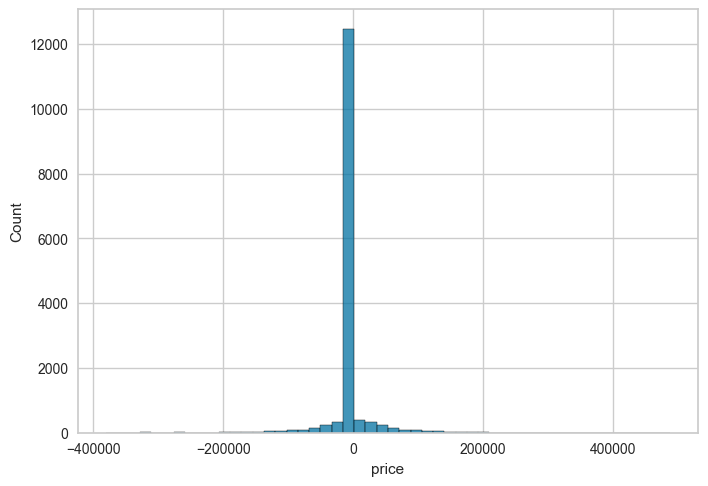

In [21]:
 # random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X1_train_scaled, y1_train)

y_predict_rf = rf_model.predict(X1_test_scaled)
rf_mse = mean_squared_error(y1_test, y_predict_rf)
rf_r2 = r2_score(y1_test, y_predict_rf)

print(f'Random Forest model MSE: {rf_mse:.4f}')
print(f'Random Forest model R^2: {rf_r2:.4f}')
print()


plt.clf()  # Clear the current figure
sns.histplot(y_predict_rf - y1_test, bins=50)
plt.show()

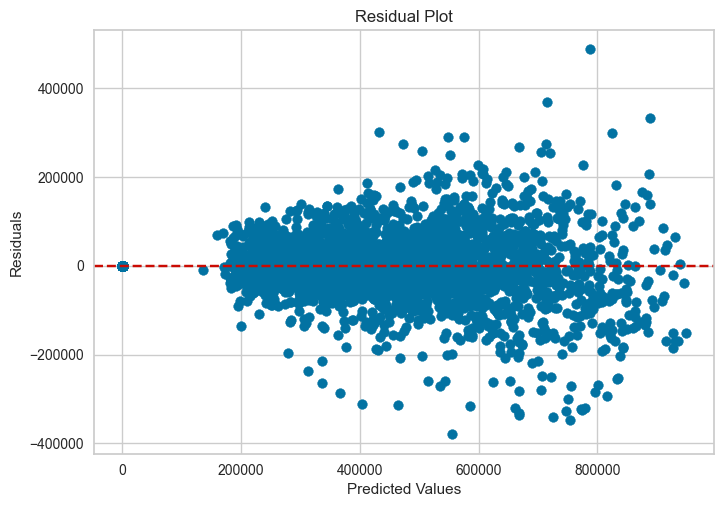

In [22]:
# ------ Error Analysis -------- #
import matplotlib.pyplot as plt

plt.scatter(y_predict_rf, y_predict_rf-y1_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Number of samples in X1_train_scaled: 60092
Number of samples in y1_train: 60092


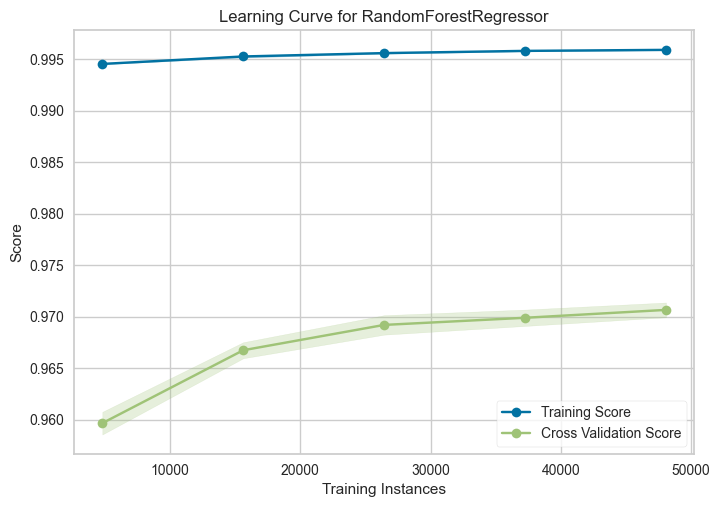

<Axes: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
# Initialize the model
randomForest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize the visualizer
visualizer = LearningCurve(randomForest_model, scoring='r2')

print(f"Number of samples in X1_train_scaled: {X1_train_scaled.shape[0]}")
print(f"Number of samples in y1_train: {len(y1_train)}")

# Fit the visualizer
visualizer.fit(X1_train_scaled, y1_train) 

# Show the visualizer
visualizer.show()         

In [24]:
# ----- creating the pipeline ---------#
# Separate the independent and dependent variables
x1 = df_cleaned.drop(columns='price')  # Drops the dependent column and stores all other independent columns
y1 = df_cleaned['price']  # Stores the dependent column        


# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

pipe.fit(x1_train, y1_train)

# Create sample data
sample_data = { 
    'level_0': [0],
    'index': [1], 
    'bedrooms': [3],
    'bathrooms': [2.5],
    'sqft_lot': [5000],
    'floors': [2],
    'condition': [3],
    'grade': [7],
    'sqft_above': [2000],
    'sqft_basement': [500],
    'yr_built': [1995],
    'lat': [47.5112],
    'long': [-122.2577],
    'sqft_living15': [2100],
    'sqft_lot15': [5100]
}


# Convert sample data to DataFrame
df_sample = pd.DataFrame(sample_data)

# Print column order used during training
print("Columns order used during training:", x1.columns.tolist())

# Print the columns of the sample data
print("Sample data columns:", df_sample.columns.tolist())

# Predict using the pipeline
predicted_price = pipe.predict(df_sample)

print(f"Predicted Price: {predicted_price[0]}")

Columns order used during training: ['level_0', 'index', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Sample data columns: ['level_0', 'index', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Predicted Price: 338329.0


In [25]:
# ------ saving the pipeline in the pickle file --------# 
with open('house_prediction_pipeline.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [26]:
#----------- loading the data -------------#

# Load the pipeline from the file
with open('house_prediction_pipeline.pkl', 'rb') as file:
    loaded_pipe = pickle.load(file)

print(loaded_pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
